# Credit Card Fraud Detection


# Anonymized credit card transactions labeled as fraudulent or genuine

Source : https://www.kaggle.com/mlg-ulb/creditcardfraud

# Context :


It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content :

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Inspiration

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Acknowledgements

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

# Importing the  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'D:\credit_card\creditcard.csv')


In [3]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Exploratory Data Analysis

In [5]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


# Exploratory Data Analysis

In [6]:
#checking Null values in our datastet

In [7]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

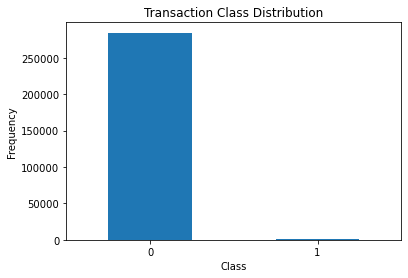

In [8]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

In [9]:

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [10]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


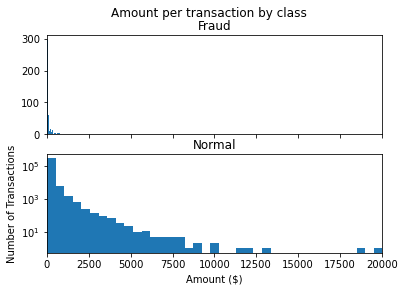

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

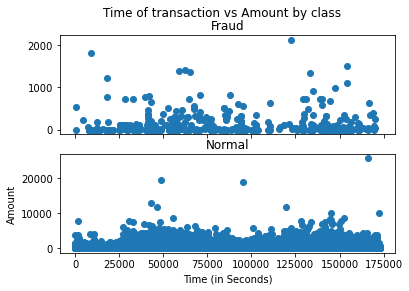

In [12]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [13]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(28481, 31)

In [14]:
data.shape

(284807, 31)

In [15]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [16]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


In [17]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

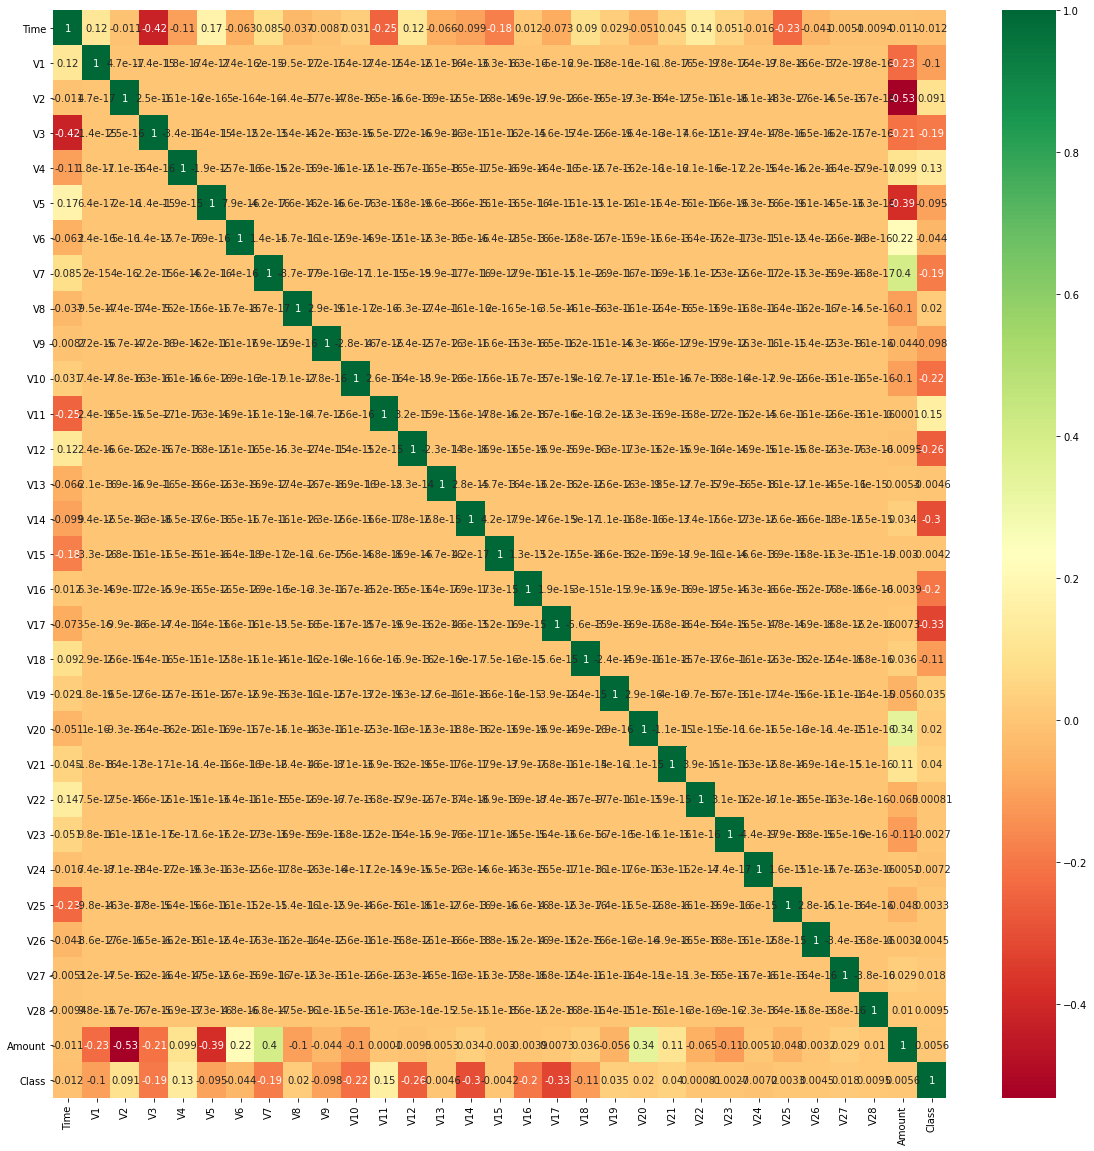

In [18]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Credit Card Kaggle- Handle Imbalanced Dataset


# Under Sampling

In [19]:
#Performing Undersampling using imblearn library
from imblearn.under_sampling import NearMiss

In [20]:
nm = NearMiss()
X_res,y_res=nm.fit_sample(X,Y)

In [21]:
X_res.shape,y_res.shape

((984, 30), (984,))

In [22]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [23]:
#Usually we dont prefer undersampling

# Over sampling

In [24]:
from imblearn.combine import SMOTETomek

In [25]:
smk = SMOTETomek(random_state=42)
X_res1,y_res1=smk.fit_sample(X,Y)

In [26]:
X_res1.shape,y_res1.shape

((567562, 30), (567562,))

In [27]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res1)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283781, 1: 283781})


# Random Over Sampler

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
os =  RandomOverSampler(1)
X_train_res, y_train_res = os.fit_sample(X, Y)

c:\users\kotha sai\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [30]:
X_train_res.shape,y_train_res.shape

((568630, 30), (568630,))

In [31]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [32]:
#Model Building 

In [33]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [34]:
X_res1.shape,y_res1.shape

((567562, 30), (567562,))

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res1,y_res1,test_size=0.2,random_state=0)

In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((454049, 30), (113513, 30), (454049,), (113513,))

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
Logistic_classifier = LogisticRegression(random_state = 0)
Logistic_classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred_lg=Logistic_classifier.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_lg = confusion_matrix(y_test, y_pred_lg)
print(cm_lg)
accuracy_score(y_test, y_pred_lg)

[[55599   949]
 [ 2039 54926]]


0.9736770237770124

In [40]:
from sklearn.metrics import classification_report

# # K-Nearest Neighbors (K-NN)

# Training the K-NN model on the Training set

In [41]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred_knn=KNN_classifier.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_knn = confusion_matrix(y_test, y_pred_lg)
print(cm_knn)
accuracy_score(y_test, y_pred_knn)

[[55599   949]
 [ 2039 54926]]


0.9629910230546281

In [44]:
cm_knn

array([[55599,   949],
       [ 2039, 54926]], dtype=int64)

# Naive Bayes


# Training the Naive Bayes model on the Training set

In [45]:
from sklearn.naive_bayes import GaussianNB
navie_classifier = GaussianNB()
navie_classifier.fit(x_train, y_train)

GaussianNB()

In [46]:
y_pred_navie=navie_classifier.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_navie = confusion_matrix(y_test, y_pred_navie)
print(cm_navie)
accuracy_score(y_test, y_pred_navie)

[[56150   398]
 [14629 42336]]


0.8676186868464405

# Decision Tree Classification

# Training the Decision Tree Classification model on the Training set

In [48]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
y_pred_DT=DT_classifier.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_DT = confusion_matrix(y_test, y_pred_DT)
print(cm_DT)
accuracy_score(y_test, y_pred_DT)

[[56456    92]
 [   35 56930]]


0.9988811854148864

# Random Forest Classification

# Training the Random Forest Classification model on the Training set

In [51]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [52]:
y_pred_RF=RF_classifier.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_RF = confusion_matrix(y_test, y_pred_RF)
print(cm_RF)
accuracy_score(y_test, y_pred_RF)

[[56531    17]
 [    3 56962]]


0.9998238087267538

# XGBoost

# Training XGBoost on the Training set

In [55]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier()
xg_classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_pred_xg=xg_classifier.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_xg = confusion_matrix(y_test, y_pred_xg)
print(cm_xg)
accuracy_score(y_test, y_pred_xg)

[[56534    14]
 [    0 56965]]


0.9998766661087276

XGBoost Classifier,Random Forest Classifier,Decision Tree classifier Gives more accuracy comapare to the other algorithms

# Classification Report For the XGBoost

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report 

TN / True Negative: when a case was negative and predicted negative


TP / True Positive: when a case was positive and predicted positive


FN / False Negative: when a case was positive but predicted negative


FP / False Positive: when a case was negative but predicted positive

Precision – What percent of your predictions were correct?
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

TP – True Positives
FP – False Positives

Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall – What percent of the positive cases did you catch? 
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

FN – False Negatives

Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

F1 score – What percent of positive predictions were correct? 

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [59]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56548
           1       1.00      1.00      1.00     56965

    accuracy                           1.00    113513
   macro avg       1.00      1.00      1.00    113513
weighted avg       1.00      1.00      1.00    113513

